In [1]:
import glob
import os
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9,6]

In [2]:
lc_fnames = ['0945060133/pps/P0945060133PNX000SRCTSR8005.FTZ']


In [3]:
lcs = []
bkglcs = []

for file in lc_fnames:
    hdul = fits.open(file)
    time = hdul[1].data.field('TIME')
    rate = hdul[1].data.field('RATE')
    err = hdul[1].data.field('ERROR')
    bkgr = hdul[1].data.field('BACKV')
    errb = hdul[1].data.field('BACKE')
    gtis = []
    for i in hdul[2].data:
        gtis.append([i[0],i[1]])
    lcs.append(Lightcurve(time, rate, err, gti=gtis, input_counts=False))
    bkglcs.append(Lightcurve(time, bkgr, errb, gti=gtis, input_counts=False))
    hdul.close()


/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")
/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")


In [4]:
solc = []
halc = []

for file in lc_fnames:
    hdul = fits.open(file)
    time = hdul[1].data.field('TIME')
    soft = hdul[1].data.field('RATE1') + hdul[1].data.field('RATE3') + hdul[1].data.field('RATE3')
    errs = hdul[1].data.field('RATE1_ERR') + hdul[1].data.field('RATE2_ERR') + hdul[1].data.field('RATE3_ERR')
    hard = hdul[1].data.field('RATE4') + hdul[1].data.field('RATE5')
    errh = hdul[1].data.field('RATE4_ERR') + hdul[1].data.field('RATE5_ERR')
    solc.append(Lightcurve(time, soft, errs, gti=gtis, input_counts=False))
    halc.append(Lightcurve(time, hard, errh, gti=gtis, input_counts=False))
    hdul.close()

/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")


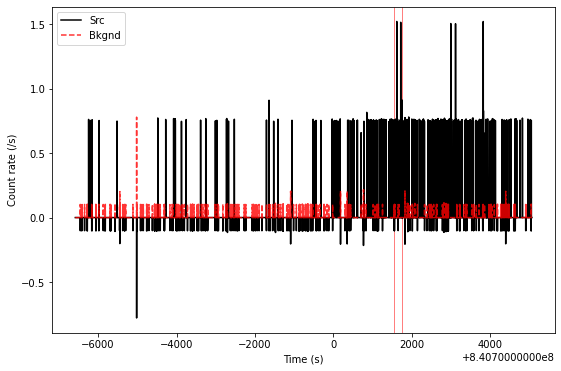

In [5]:
for i in range(len(lcs)):
    plt.plot(lcs[i].time,lcs[i].countrate,color='k',label='Src')
    plt.plot(bkglcs[i].time,bkglcs[i].countrate,color='r',ls="--",alpha=0.8,label='Bkgnd')
    for j in range(len(lcs[i].gti)-1):
        plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='r',alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Count rate (/s)')
    plt.legend(loc='upper left')
    plt.show()

/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:408: RuntimeWarning: invalid value encountered in multiply
  counts_err = self._countrate_err * self.dt
/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:388: RuntimeWarning: invalid value encountered in multiply
  counts = self._countrate * self.dt
/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:408: RuntimeWarning: invalid value encountered in multiply
  counts_err = self._countrate_err * self.dt
/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:388: RuntimeWarning: invalid value encountered in multiply
  counts = self._countrate * self.dt


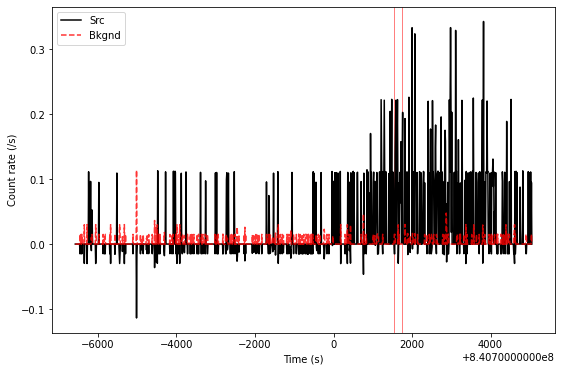

In [6]:
for i in range(len(lcs)):
    plt.plot(lcs[i].rebin(10).time,lcs[i].rebin(10).countrate,color='k',label='Src')
    plt.plot(bkglcs[i].rebin(10).time,bkglcs[i].rebin(10).countrate,color='r',ls="--",alpha=0.8,label='Bkgnd')
    for j in range(len(lcs[i].gti)-1):
        plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='r',alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Count rate (/s)')
    plt.legend(loc='upper left')
    plt.show()

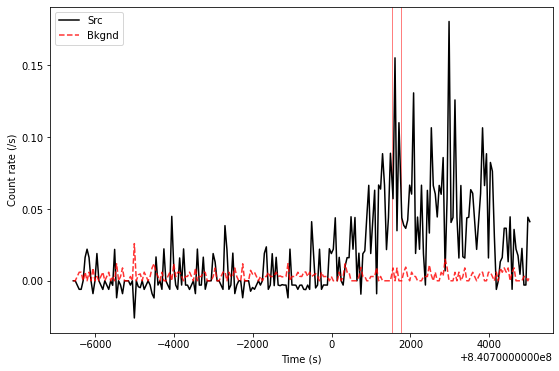

In [7]:
for i in range(len(lcs)):
    plt.plot(lcs[i].rebin(50).time,lcs[i].rebin(50).countrate,color='k',label='Src')
    plt.plot(bkglcs[i].rebin(50).time,bkglcs[i].rebin(50).countrate,color='r',ls="--",alpha=0.8,label='Bkgnd')
    for j in range(len(lcs[i].gti)-1):
        plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='r',alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Count rate (/s)')
    plt.legend(loc='upper left')
    plt.show()

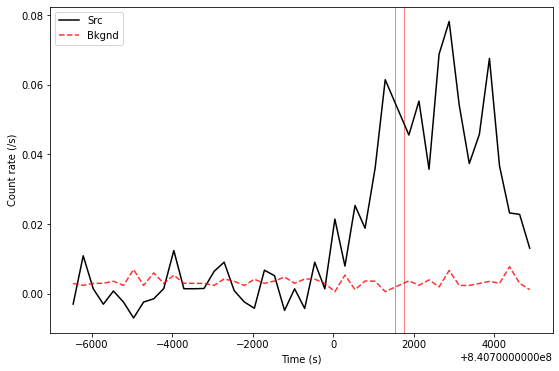

In [8]:
for i in range(len(lcs)):
    plt.plot(lcs[i].rebin(250).time,lcs[i].rebin(250).countrate,color='k',label='Src')
    plt.plot(bkglcs[i].rebin(250).time,bkglcs[i].rebin(250).countrate,color='r',ls="--",alpha=0.8,label='Bkgnd')
    for j in range(len(lcs[i].gti)-1):
        plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='r',alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Count rate (/s)')
    plt.legend(loc='upper left')
    plt.show()
    

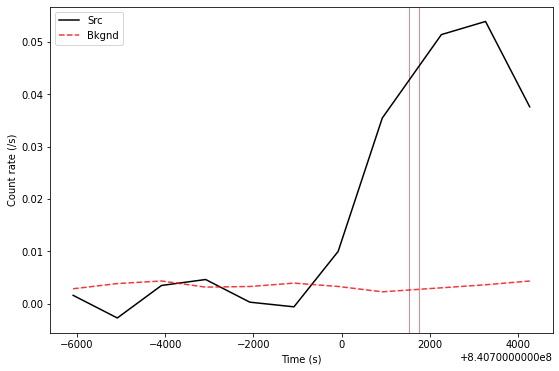

In [9]:
for i in range(len(lcs)):
    plt.plot(lcs[i].rebin(1000).time,lcs[i].rebin(1000).countrate,color='k',label='Src')
    plt.plot(bkglcs[i].rebin(1000).time,bkglcs[i].rebin(1000).countrate,color='r',ls="--",alpha=0.8,label='Bkgnd')
    for j in range(len(lcs[i].gti)-1):
        plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='r',alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Count rate (/s)')
    plt.legend(loc='upper left')
    plt.show()
    

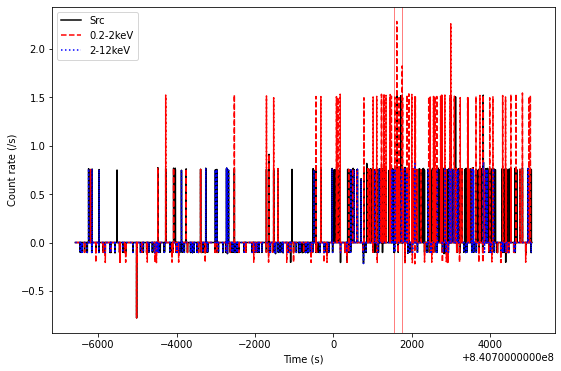

In [10]:
for i in range(len(lcs)):
    plt.plot(lcs[i].time,lcs[i].countrate,color='k',label='Src')
    plt.plot(solc[i].time,solc[i].countrate,color='r',ls="--",label='0.2-2keV')
    plt.plot(halc[i].time,halc[i].countrate,color='b',ls="dotted",label='2-12keV')
    for j in range(len(lcs[i].gti)-1):
        plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='r',alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Count rate (/s)')
    plt.legend(loc='upper left')
    plt.show()

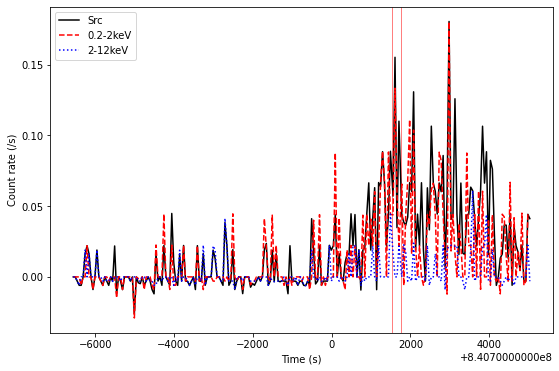

In [11]:
for i in range(len(lcs)):
    plt.plot(lcs[i].rebin(50).time,lcs[i].rebin(50).countrate,color='k',label='Src')
    plt.plot(solc[i].rebin(50).time,solc[i].rebin(50).countrate,color='r',ls="--",label='0.2-2keV')
    plt.plot(halc[i].rebin(50).time,halc[i].rebin(50).countrate,color='b',ls="dotted",label='2-12keV')
    for j in range(len(lcs[i].gti)-1):
        plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='r',alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Count rate (/s)')
    plt.legend(loc='upper left')
    plt.show()

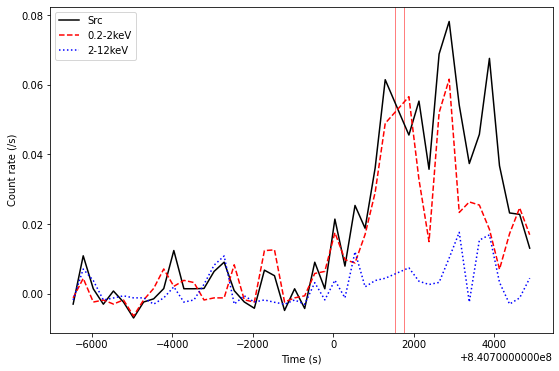

In [12]:
for i in range(len(lcs)):
    plt.plot(lcs[i].rebin(250).time,lcs[i].rebin(250).countrate,color='k',label='Src')
    plt.plot(solc[i].rebin(250).time,solc[i].rebin(250).countrate,color='r',ls="--",label='0.2-2keV')
    plt.plot(halc[i].rebin(250).time,halc[i].rebin(250).countrate,color='b',ls="dotted",label='2-12keV')
    for j in range(len(lcs[i].gti)-1):
        plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='r',alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Count rate (/s)')
    plt.legend(loc='upper left')
    plt.show()
    

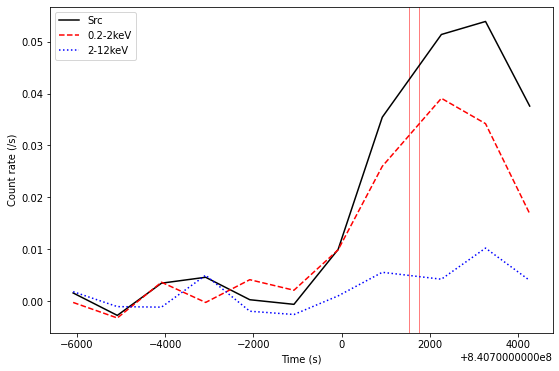

In [13]:
for i in range(len(lcs)):
    plt.plot(lcs[i].rebin(1000).time,lcs[i].rebin(1000).countrate,color='k',label='Src')
    plt.plot(solc[i].rebin(1000).time,solc[i].rebin(1000).countrate,color='r',ls="--",label='0.2-2keV')
    plt.plot(halc[i].rebin(1000).time,halc[i].rebin(1000).countrate,color='b',ls="dotted",label='2-12keV')
    for j in range(len(lcs[i].gti)-1):
        plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='r',alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Count rate (/s)')
    plt.legend(loc='upper left')
    plt.show()
    